# Cell-Cell Communication

Cell-cell communication refers to the process by which cells interact with each other, using molecular signals. The signals can be transmitted through various mechanisms, such as the release of signaling molecules called ligands by one cell that bind to receptors on another cell, or through direct physical contact between cells. Cell-cell communication could play a critical role in a wide range of biological processes, including development, immune responses, and tissue repair, among others. 

## Cell Clustering

Download our [example data](https://pan.genomics.cn/ucdisk/s/BvIrye), and complete basic analysis processing.

In [2]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read data
data_path = './SS200000135TL_D1.cellbin.gef'
data = st.io.read_gef(data_path, bin_type='cell_bins')

# preprocessing
data.tl.cal_qc()

# data.plt.genes_count is a good option to observe gene distribution before filtering
data.tl.filter_cells(min_gene=1, max_gene=2000, min_n_genes_by_counts=3, max_n_genes_by_counts=800, pct_counts_mt=6, inplace=True)

data.tl.raw_checkpoint()
data.tl.normalize_total()

# clustering
data.tl.pca(n_pcs=50, res_key='pca', use_highly_genes=False)
data.tl.neighbors(pca_res_key='pca', res_key='neighbors')
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

## Communication Analysis

`analysis_type` can be set to `simple` or `statistical`. `simple` does not rely on any statistics and only provides the mean expression values for each interaction for each possible cell type pair, while `statistical` estimates statistical enrichment using a permutation approach.

This function currently supports the species of `HUMAN` and `MOUSE`. If input the data of other species, you have to translate the genes to homologous genes of human or mouse. You can select a database from `cellphonedb`, `liana` and `celltalkdb`, or input the path of your own database.

<div class="alert alert-info">

**Note**

`HUMAN` species can not be used with `celltalkdb` database.

</div>

In [13]:
data.tl.cell_cell_communication(
                                analysis_type='statistical',
                                cluster_res_key='leiden',
                                species='MOUSE',
                                database='cellphonedb',
                                res_key='cell_cell_communication'
                                )

[2023-03-14 13:21:07][Stereo][43221][140403282261824][st_pipeline][69][INFO]: register algorithm cell_cell_communication to <stereo.core.st_pipeline.StPipeline object at 0x7fb1e1856a60>
[2023-03-14 13:21:07][Stereo][43221][140403282261824][main][338][INFO]: species: MOUSE
[2023-03-14 13:21:07][Stereo][43221][140403282261824][main][339][INFO]: database: cellphonedb
[2023-03-14 13:21:52][Stereo][43221][140403282261824][main][391][INFO]: [statistical analysis] Threshold:0.1 Precision:3 Iterations:500 Threads:1
[2023-03-14 13:22:02][Stereo][43221][140403282261824][main][421][INFO]: Running Real Analysis
[2023-03-14 13:22:02][Stereo][43221][140403282261824][main][435][INFO]: Running Statistical Analysis
statistical analysis: 100%|███████████████████████████████████████| 500/500 [10:27<00:00,  1.26s/it]
[2023-03-14 13:32:30][Stereo][43221][140403282261824][main][1237][INFO]: Building Pvalues result
[2023-03-14 13:32:30][Stereo][43221][140403282261824][main][1272][INFO]: Building results


Otherwise, you could set `subsampling=True` to enable subsampleing for faster performance.

## Observation of Results

View the results of Cell-cell communication stored in `data.tl.result`.

In [14]:
# mean
data.tl.result['cell_cell_communication']['means']

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,19|10,19|11,19|12,19|13,19|14,19|15,19|16,19|17,19|18,19|19
1,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CPI-CS047D9C0D7,LeukotrieneB4_byLTA4H_LTB4R,complex:LeukotrieneB4_byLTA4H,simple:Q15722,,LTB4R,True,False,True,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CPI-CS04A56D5BE,12oxoLeukotrieneB4_byPTGR1_LTB4R2,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q9NPC1,,LTB4R2,True,False,True,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CPI-CS0F5B070C5,LeukotrieneB4_byLTA4H_LTB4R2,complex:LeukotrieneB4_byLTA4H,simple:Q9NPC1,,LTB4R2,True,False,True,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CPI-CS0AFE4D0CB,LeukotrieneB4_byLTA4H_GPR17,complex:LeukotrieneB4_byLTA4H,simple:Q13304,,GPR17,True,False,True,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,CPI-SS0F2FBF1F6,ROBO3_NELL2,simple:Q96MS0,simple:Q99435,ROBO3,NELL2,True,True,False,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,CPI-SC060C69786,NRTN_RET_receptor_2,simple:Q99748,complex:RET_receptor_2,NRTN,,True,False,True,curated,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,CPI-SS050123B31,NPFFR1_NPVF,simple:Q9GZQ6,simple:Q9HCQ7,NPFFR1,NPVF,True,True,False,guidetopharmacology.org,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224,CPI-SS0C5DEF2EC,NPVF_NPFFR2,simple:Q9HCQ7,simple:Q9Y5X5,NPVF,NPFFR2,True,False,False,guidetopharmacology.org,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# significant mean
data.tl.result['cell_cell_communication']['significant_means']

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,19|10,19|11,19|12,19|13,19|14,19|15,19|16,19|17,19|18,19|19
2049,CPI-SS01D36DDFA,PTPRS_NTRK3,simple:Q13332,simple:Q16288,PTPRS,NTRK3,False,True,True,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1749,CPI-SS082900482,GPR37L1_PSAP,simple:O60883,simple:P07602,GPR37L1,PSAP,True,True,False,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1513,CPI-SS00F4DDF4B,PTN_PTPRS,simple:P21246,simple:Q13332,PTN,PTPRS,True,False,True,"I2D,IMEx,InnateDB-All,IntAct",...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1318,CPI-SS06A0B20BD,FGFR2_EPHA4,simple:P21802,simple:P54764,FGFR2,EPHA4,True,True,True,"I2D,InnateDB-All",...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1435,CPI-SS04E690D72,PTN_PTPRZ1,simple:P21246,simple:P23471,PTN,PTPRZ1,True,False,False,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CPI-SC0F1833AC0,COL4A5_integrin_a10b1_complex,simple:P29400,complex:integrin_a10b1_complex,COL4A5,,True,False,False,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
504,CPI-SC068FFC547,COL8A1_integrin_a10b1_complex,simple:P27658,complex:integrin_a10b1_complex,COL8A1,,True,False,False,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
503,CPI-SC0DA063880,COL5A3_integrin_a10b1_complex,simple:P25940,complex:integrin_a10b1_complex,COL5A3,,True,False,False,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
513,CPI-SC027EF0F68,COL16A1_integrin_a10b1_complex,simple:Q07092,complex:integrin_a10b1_complex,COL16A1,,True,False,False,curated,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [16]:
# p-value
data.tl.result['cell_cell_communication']['pvalues']

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,19|10,19|11,19|12,19|13,19|14,19|15,19|16,19|17,19|18,19|19
1,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,CPI-CS047D9C0D7,LeukotrieneB4_byLTA4H_LTB4R,complex:LeukotrieneB4_byLTA4H,simple:Q15722,,LTB4R,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,CPI-CS04A56D5BE,12oxoLeukotrieneB4_byPTGR1_LTB4R2,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q9NPC1,,LTB4R2,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,CPI-CS0F5B070C5,LeukotrieneB4_byLTA4H_LTB4R2,complex:LeukotrieneB4_byLTA4H,simple:Q9NPC1,,LTB4R2,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,CPI-CS0AFE4D0CB,LeukotrieneB4_byLTA4H_GPR17,complex:LeukotrieneB4_byLTA4H,simple:Q13304,,GPR17,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,CPI-SS0F2FBF1F6,ROBO3_NELL2,simple:Q96MS0,simple:Q99435,ROBO3,NELL2,True,True,False,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2222,CPI-SC060C69786,NRTN_RET_receptor_2,simple:Q99748,complex:RET_receptor_2,NRTN,,True,False,True,curated,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2223,CPI-SS050123B31,NPFFR1_NPVF,simple:Q9GZQ6,simple:Q9HCQ7,NPFFR1,NPVF,True,True,False,guidetopharmacology.org,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2224,CPI-SS0C5DEF2EC,NPVF_NPFFR2,simple:Q9HCQ7,simple:Q9Y5X5,NPVF,NPFFR2,True,False,False,guidetopharmacology.org,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
# deconvoluted
data.tl.result['cell_cell_communication']['deconvoluted']

,gene_name,uniprot,is_complex,protein_name,complex_name,id_cp_interaction,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
gene,,,,,,,,,,,,,,,,,,,,,
PTGR1,PTGR1,Q14914,True,PTGR1_HUMAN,12oxoLeukotrieneB4_byPTGR1,CPI-CS0A5B6BD7A,0.009,0.000,0.034,0.000,...,0.000,0.058,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
PTGR1,PTGR1,Q14914,True,PTGR1_HUMAN,12oxoLeukotrieneB4_byPTGR1,CPI-CS04A56D5BE,0.009,0.000,0.034,0.000,...,0.000,0.058,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
CYP11A1,CYP11A1,P05108,True,CP11A_HUMAN,22Hydroxycholesterol_byCYP11A1,CPI-CS08D535BCF,0.045,0.021,0.018,0.031,...,0.014,0.000,0.000,0.013,0.000,0.054,0.000,0.000,0.0,0.0
DAGLA,DAGLA,Q9Y4D2,True,DGLA_HUMAN,2arachidonoylglycerol_byDAGLA,CPI-CS03629A52A,0.416,0.459,0.382,0.606,...,0.318,0.254,0.248,0.203,0.149,0.374,0.000,0.814,0.0,0.0
DAGLA,DAGLA,Q9Y4D2,True,DGLA_HUMAN,2arachidonoylglycerol_byDAGLA,CPI-CS045C37E64,0.416,0.459,0.382,0.606,...,0.318,0.254,0.248,0.203,0.149,0.374,0.000,0.814,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PROK2,PROK2,Q9HC23,False,PROK2_HUMAN,,CPI-SS027E57635,0.000,0.003,0.000,0.000,...,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
PROK2,PROK2,Q9HC23,False,PROK2_HUMAN,,CPI-SS01CE67526,0.000,0.003,0.000,0.000,...,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
NELL2,NELL2,Q99435,False,NELL2_HUMAN,,CPI-SS0F2FBF1F6,1.736,2.195,2.371,2.986,...,1.719,0.719,0.258,0.668,1.382,3.271,3.375,3.631,0.0,0.0


Set parameters, `output`, `*_filename` and `output_format`, to save results into files, more in API.

## Visualization of Communication

</div>

**Note**

Currently, only `statistical` analysis type is supported to visualization.

</div>

Here recommend you setting `interacting_pairs` and `clusters1` before plotting, because the whole result is too huge to be displayed.

[2023-03-14 14:23:13][Stereo][43221][140403282261824][main][86][INFO]: Generating dot plot


Row
    [0] TextInput(placeholder='Enter a file name...', width=200)
    [1] Button(button_type='primary', name='download', width=100)
    [2] StaticText(width=800)

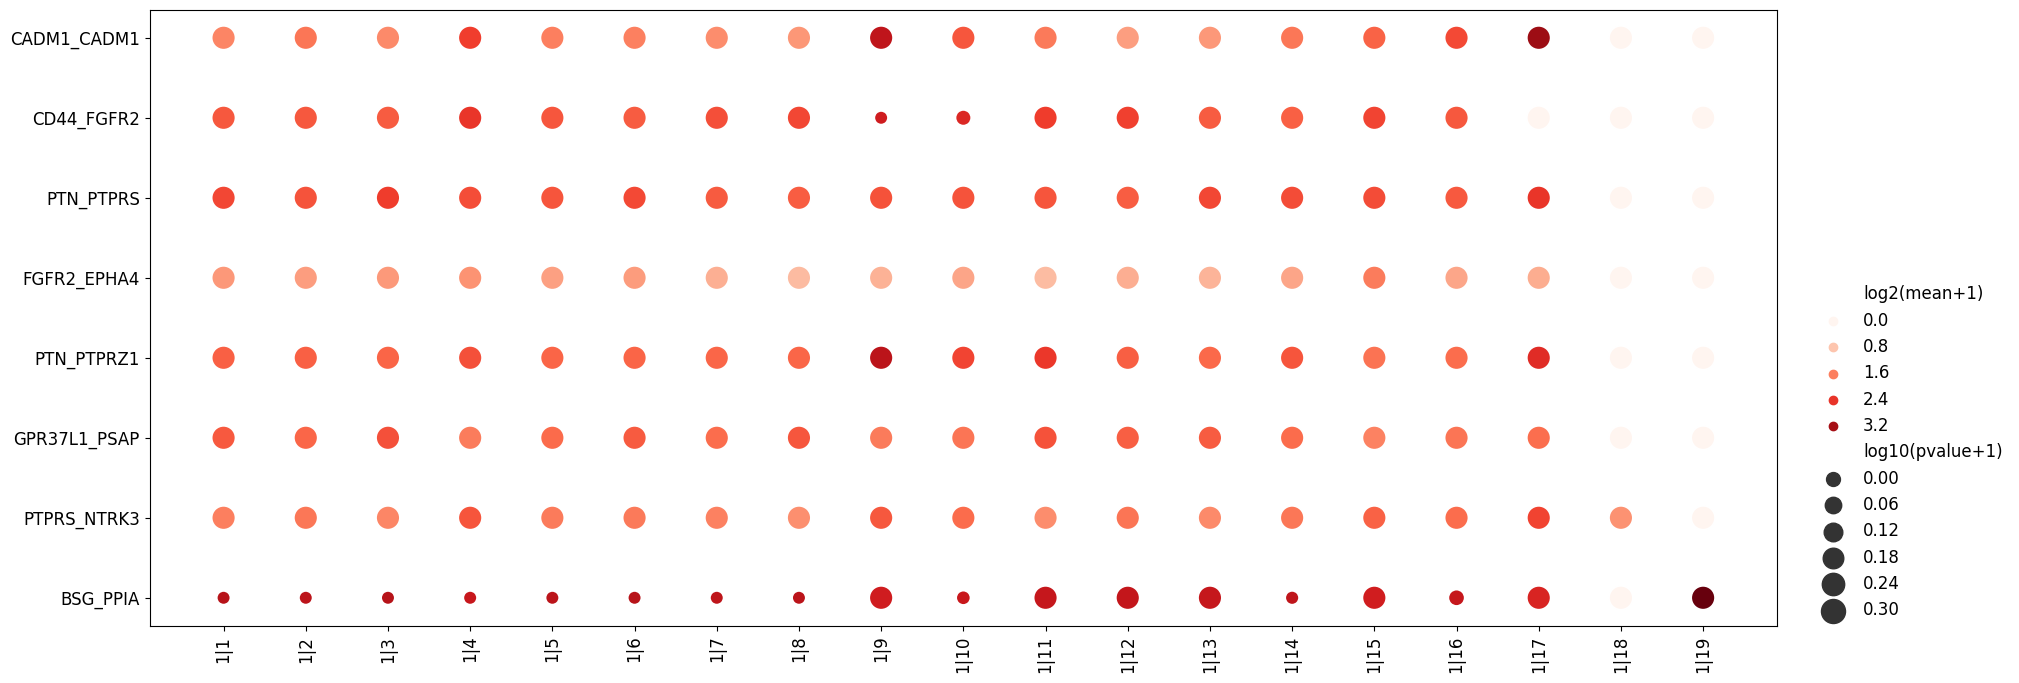

In [22]:
# a list of 'gene1_gene2'
interacting_pairs = [
                    'CADM1_CADM1',
                    'CD44_FGFR2',
                    'PTN_PTPRS',
                    'FGFR2_EPHA4',
                    'PTN_PTPRZ1',
                    'GPR37L1_PSAP',
                    'PTPRS_NTRK3',
                    'BSG_PPIA'
                    ]

data.plt.ccc_dot_plot(
                    res_key='cell_cell_communication', 
                    interacting_pairs=interacting_pairs, 
                    clusters1='1'
                    )

Display the communication heatmap of cell pairs.

[2023-03-14 13:32:32][Stereo][43221][140403282261824][plot_collection][82][INFO]: register plot_func ccc_heatmap to <stereo.plots.plot_collection.PlotCollection object at 0x7fb1e1870100>
[2023-03-14 13:32:32][Stereo][43221][140403282261824][main][164][INFO]: Generating heatmap plot


Row
    [0] TextInput(placeholder='Enter a file name...', width=200)
    [1] Button(button_type='primary', name='download', width=100)
    [2] StaticText(width=800)

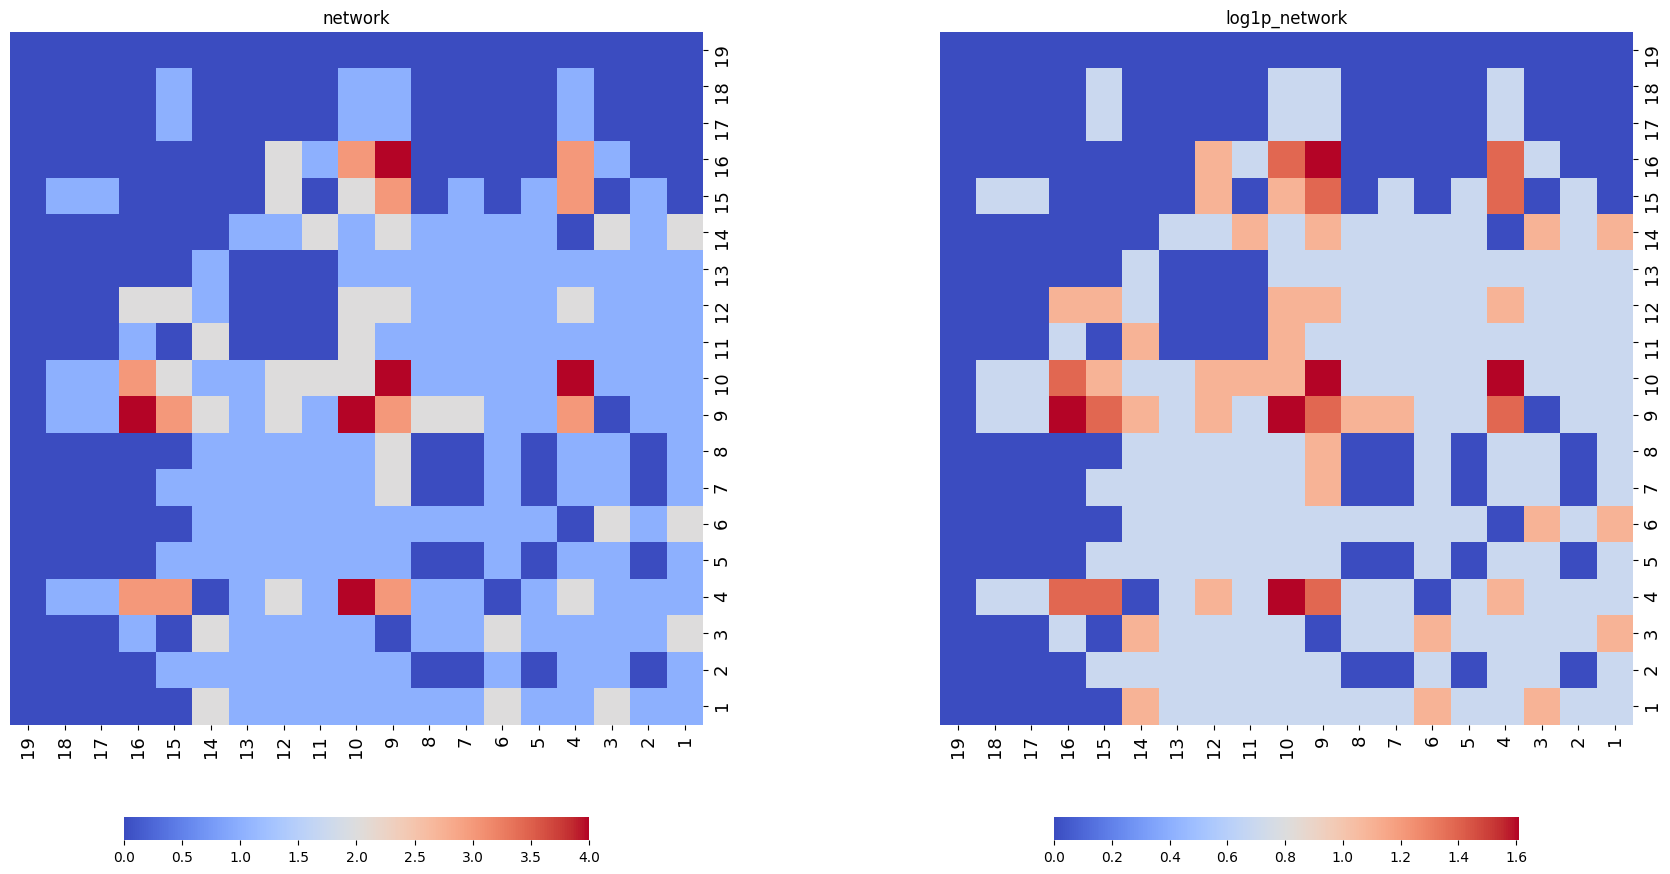

In [20]:
data.plt.ccc_heatmap(res_key='cell_cell_communication')